**Ejercicio 1:** Implemente rutinas que permitan el entrenamiento y prueba de un perceptrón simple con una cantidad variable de entradas. Se deben tener en cuenta las siguientes capacidades: 
- lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato texto separado por comas,
- selección del criterio de finalización del entrenamiento y el número máximo de épocas,
- selección de la tasa de aprendizaje,
- prueba del perceptrón entrenado mediante archivos de texto con el mismo formato separado por comas.
Una vez obtenido dicho programa, pruébelo en la resoluci ́on del problema OR, utilizando los archivos de patrones OR trn.csv y OR tst.csv para el entrenamiento y la prueba, respectivamente.

#### Librerías

In [53]:
import random
import numpy as np
import csv
import matplotlib.pyplot as plt

#### Entrenamiento
Obtenemos las *cant_e* entradas y la salida esperada para cada patrón a partir del archivo de texto *trn*.

In [54]:
trn = np.loadtxt('./data/OR_trn.csv',delimiter=',')

yd = [] # Salida esperadas
for i in range(len(trn)): 
    fila = trn[i]
    cant_e = len(fila) - 1 # Cantidad de entradas
    yd.append(fila[cant_e]) # Salidas esperadas
    aux = [-1]
    for j in range(cant_e):
        aux.append(fila[j])
    trn[i] = aux # Vector de entradas

Inicializamos al azar el vector de pesos, cuyo tamaño será la cantidad de entradas más uno (correspondiente al peso w0: sesgo o umbral de la neurona).

In [55]:
w = [] # Vector de pesos
for i in range(cant_e+1):
    aux = random.uniform(-0.5,0.5)
    w.append(aux)

Se realiza el algoritmo con dos criterios de parada: máximo de épocas (iteraciones) y porcentaje máximo de error.

In [56]:
epoca = 0
epoca_max = 10 # Máximo de iteraciones
cont_error = 0
gamma = 0.1 # Velocidad de aprendizaje
errores = np.zeros(epoca_max)
perc_error_max = 0.02 # Porcentaje máximo de error
error_max = perc_error_max * len(trn) # Cantidad máxima de errores

while (epoca < epoca_max):
    cont_error = 0
    for patron in range(len(trn)):
        x = trn[patron] # Entradas
        y = w @ x
        y = np.sign(y)

        error = yd[patron] - y
        if error != 0: cont_error += 1 

        w = w + gamma*error*x # Corrijo pesos

    errores[epoca] = cont_error
    if cont_error < error_max: break
    epoca += 1

Obtenemos gráfica del error en el entrenamiento a medida que pasan las épocas.

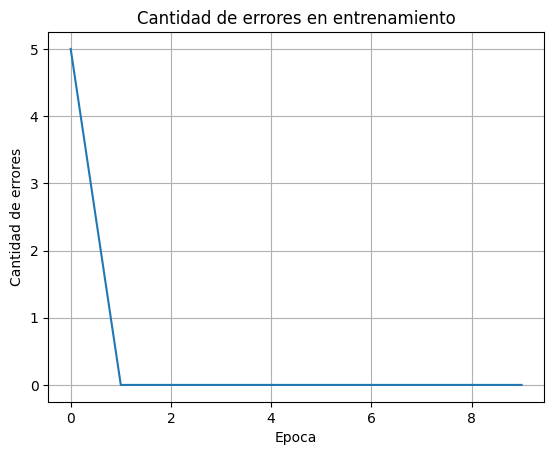

In [57]:
fig,ax = plt.subplots()
plt.plot(range(epoca_max),errores)
ax.set(xlabel = 'Epoca',ylabel='Cantidad de errores')
plt.title('Cantidad de errores en entrenamiento')
ax.grid()
plt.show()

#### Prueba
Repetimos el proceso de carga de datos y paso los patrones por la red obtenida para evaluar el desempeño de la misma.

In [58]:
tst = np.loadtxt('./data/OR_tst.csv',delimiter=',')

yd = [] # Salida esperadas
for i in range(len(tst)): 
    fila = tst[i]
    cant_e = len(fila) - 1 # Cantidad de entradas
    yd.append(fila[cant_e]) # Salidas esperadas
    aux = [-1]
    for j in range(cant_e):
        aux.append(fila[j])
    tst[i] = aux # Vector de entradas

cont_error = 0
for patron in range(len(tst)):
    x = tst[patron] # Entradas
    y = w @ x
    y = np.sign(y)

    error = yd[patron] - y
    if error != 0: cont_error += 1

print('Pesos:',w)
print('Cantidad de errores en la prueba:',cont_error,'/',len(tst))

Pesos: [-0.41081841  0.23122433  0.20313786]
Cantidad de errores en la prueba: 0 / 200
